Questions taken from: https://astro-330.github.io/Lab1/Lab1.html

In [1]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

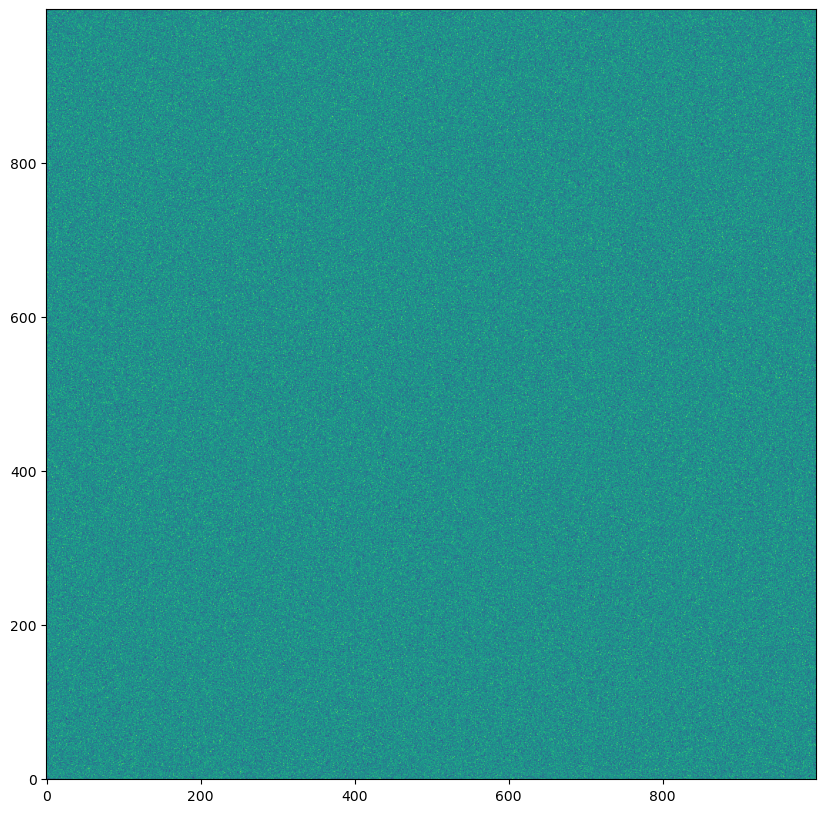

In [2]:
# 2D array of dimensions 1000 x 1000, in which the values in each pixel are random-gaussian distributed 
# about a mean of 10, with a sigma of 2, and then use matplotlib to display this image. 
# Make sure (0,0) is in the lower lefthand corner.

# mean
mu = 10
# sigma/std dev.
sigma = 2
# create general distribution
Gauss = stats.norm(loc=mu,scale=sigma)
# pull random values from dist into 1000.1000 array
array = Gauss.rvs((1000,1000))
# create plot
fig, ax = plt.subplots(figsize=(10,10))
# show plot
ax.imshow(array,origin='lower')

The distribution of pixels in your above image should not have many outliers beyond 3-sigma from the mean, but there will be some. Find the location of any 3-sigma outliers in the image, and highlight them by circling their location. Confirm that the fraction of these out of the total number of pixels agrees with the expectation for a normal distribution.

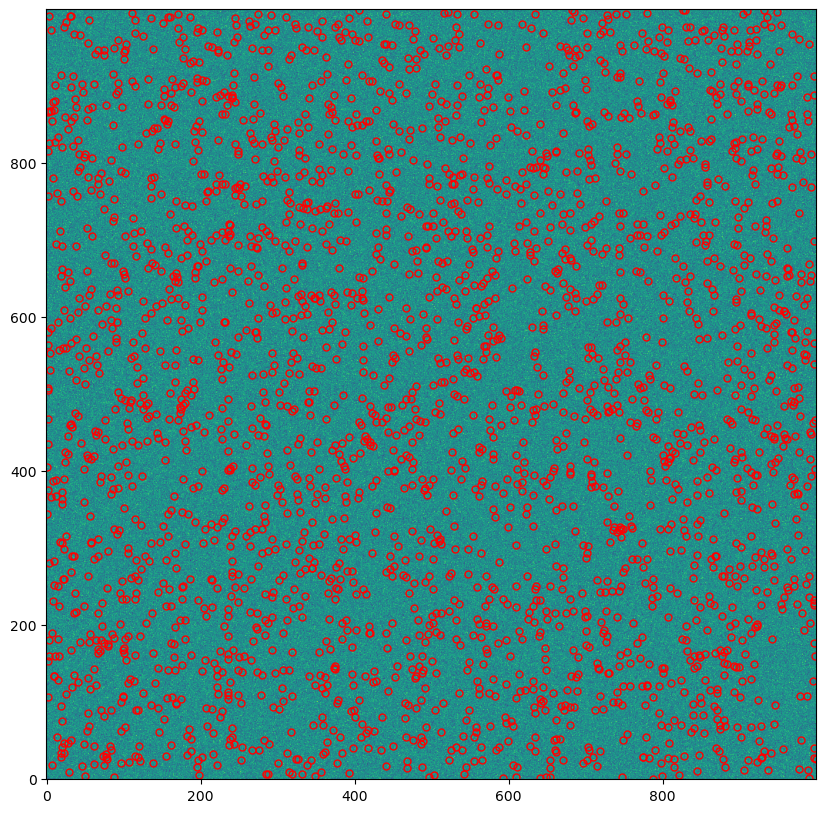

In [3]:
# In English: for any values in [array] > mean + 3*sigma,
# circle their location (using markers?).
# Identify their fraction/total pixels (3sigs/array),
# and confirm that ratio meets that expected for a normal dist.

# lift outliers to variable using .where:
# "any values beyond PLUS or MINUS (mean + 3*sigma)"
outliers = np.where((array>mu+3*sigma)|(array<mu-3*sigma))
# create figure & axes
fig, ax = plt.subplots(figsize=(10,10))
# create image on figure
ax.imshow(array,origin='lower')
# plot outliers as circles on image
ax.plot(outliers[0],outliers[1],'o',ms=5,color='None',mec='r')

When dealing with astronomical data, it is sometimes advisable to not include outliers in a calculation being performed on a set of data (in this example, an image). We know, of course, that the data we’re plotting ARE coming from a gaussian distribution, so there’s no reason to exclude, e.g., 3-sigma outliers, but for this example, let’s assume we want to.

Create a numpy masked array in which all pixels that are > 3σ
from the image mean are masked. Then, calculate the mean and sigma of the new masked array.

*"A masked array is the combination of a standard numpy.ndarray and a mask. A mask is either nomask, indicating that no value of the associated array is invalid, or an array of booleans that determines for each element of the associated array whether the value is valid or not. When an element of the mask is False, the corresponding element of the associated array is valid and is said to be unmasked. When an element of the mask is True, the corresponding element of the associated array is said to be masked (invalid)."*

In [4]:
# define a masked array using [array] where [outliers]
# are masked
import numpy.ma as ma
array_ma =  ma.masked_where((array>mu+3*sigma)|(array<mu-3*sigma),array)
ma_mu = np.mean(array_ma)
ma_sigma = np.std(array_ma)
print(f"Masked mean = {ma_mu},\nMasked sigma = {ma_sigma}")



Masked mean = 9.998691855410208,
Masked sigma = 1.974226781195251


Using Array indexing, re-plot the same array from above, but zoom in on the inner 20% of the image, such that the full width is 20% of the total. Note: try not to hard code your indexing. You should be able to flexibly change the percentage. For this one, use a white-to-black color map.

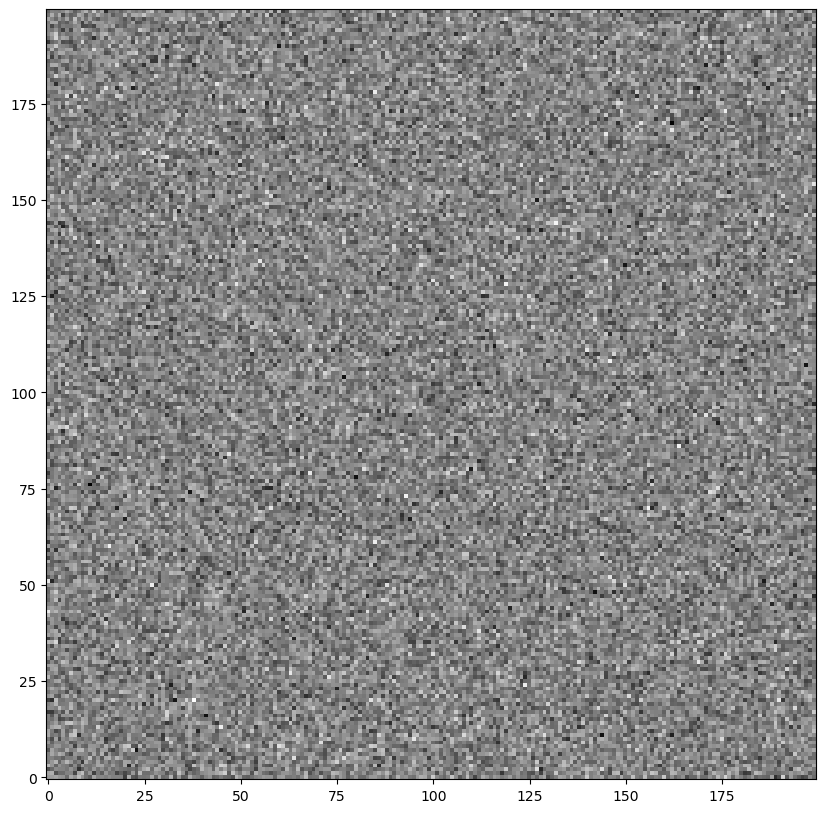

In [5]:
# integer-ed variable of [array]'s 1st dimension's length,
# divided in half. I.e., 1D = 1000, divided by 2.
cent = int(array.shape[0] / 2)
# another integer variable, this time 20% of [array]'s 1st
# dimension's length * 50%... i.e., 20% of 50% of the 1D length...?
perc = int(0.2 * array.shape[0]*0.5)
# then define a cropped version of [array], such that the dimensions are
# x = 500-100:500+100,  y = 500-100:500+100
# i.e., select INNER 20% of pixels, which is 10% *either side of each axes' mid-way point*
cropped_array = array[cent-perc:cent+perc,cent-perc:cent+perc]
fig, ax = plt.subplots(figsize=(10,10))
ax.imshow(cropped_array,origin='lower',cmap='gray_r');

Question 5¶

Often, we have an expression to calculate of the form
∑i∑jaibj

Your natural impulse for coding this double sum might look like this:

`total = 0`
`for i in a:`
`    for j in b:`
`         total+= i*j`


which, mathematically, makes sense! But as it turns out, there’s a way we can do this without any loops at all — and when a⃗  and b⃗ 

get long, this becomes hugely important in our code.

The trick we’re going to use here is called array broadcasting, which you can read about at the link if you’re not already familar. I’m going to give you a⃗ 
and b⃗ below. 

For this exercise, calculate the double sum indicated above without the use of a for-loop. Check that your code worked by using the slow double-loop method.

Hint

The command np.newaxis will be useful here, or for a slightly longer solution, try np.repeat and reshape().

`a = np.array([1,5,10,20])`
`b = np.array([1,2,4,16])`

# Your Code

Tip

If you’re familiar with the jupyter magic command %%timeit, try timing your loop vs non-loop solutions with a longer list (say, 5000 random numbers in a⃗ 
and b⃗ ). How much faster is the non-loop?

In [6]:
a = np.array([1,5,10,20])
b = np.array([1,2,4,16])
# What the slow method looks like:
# `total = 0`
#`for i in a:`
#`    for j in b:`
#`         total+= i*j`

In [7]:
out = np.sum(a[:,np.newaxis]*b)
out

828

Q6
===
Model with 2 parameters, a and b;

Metric describing accuracy of model (how well it fits) = chi^2

"We may then want to plot this χ2 value for each point on our grid – that is, at each grid position corresponding to some ai and bj." - plot a grid showing the accuracy...

A sample chi^2 is given: Create some arrays of a and b to test that range between 1 and 25, and have 10 entries evenly spaced between those values. Then, loop over them and find the χ2 using my function.

In [8]:
def chi2(a,b):
    return ((15-a)**2+(12-b)**2)**0.2 #note, this is nonsense, but should return a different value for each input a,b

# "create some arrays of a and b to test range between 1-25",
# "have 10 entries evenly spaced between those values"
a = np.linspace(1,25,10)
b = np.linspace(1,25,10)
# Loop over them finding chi^2 using the above fn
# create empty list to add vals to
chi2_values = []
# loop over arrays appending to above
for i in a:
    for j in b:
        chi2_values.append(chi2(i,j))
    

Once you’ve stored the χ2 values for each combination of a and b, create a plot with a and b as the axes and show using colored circles the χ2

value at each location. Add a colorbar to see the values being plotted.

To create this grid, use the np.meshgrid() function. For your plot, make sure the marker size is big enough to see the colors well.

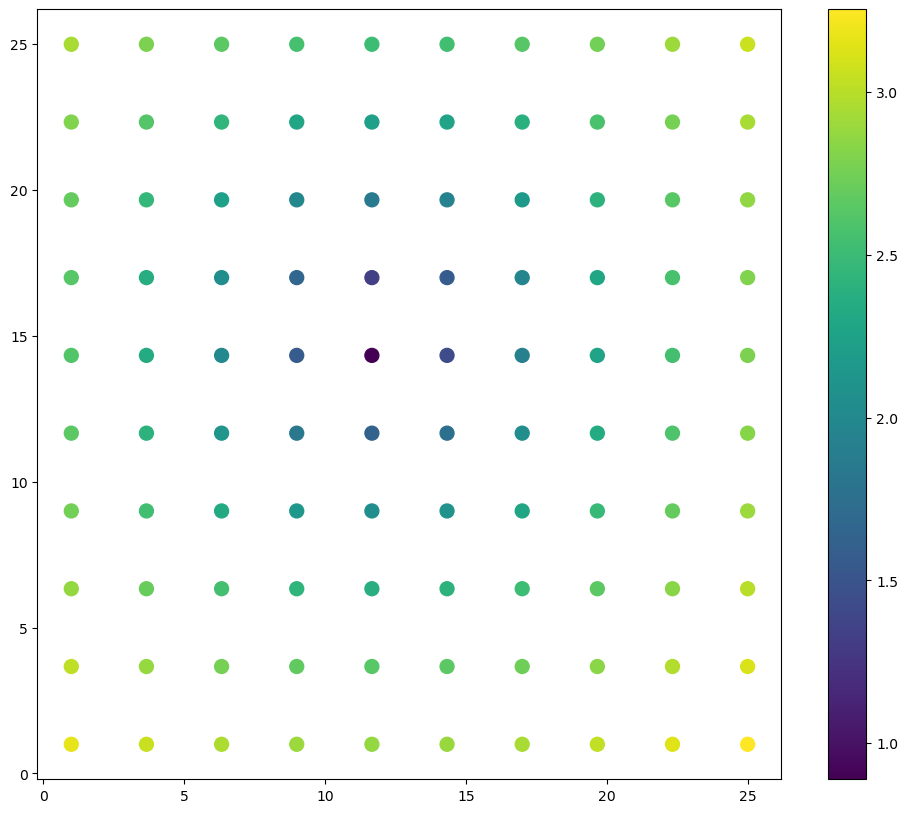

In [9]:
def chi2(a,b):
    return ((15-a)**2+(12-b)**2)**0.2 #note, this is nonsense, but should return a different value for each input a,b

# Solution 
a = np.linspace(1,25,10)
b = np.linspace(1,25,10)
chi2_values = []
for i in a:
    for j in b:
        chi2_values.append(chi2(i,j))

chi2_values = np.array(chi2_values)

# use .meshgrid to create 2x2D Arrays, to use as coords...?
xx,yy = np.meshgrid(a,b)

fig, ax = plt.subplots(figsize=(12,10))

im = ax.scatter(xx,yy,c=chi2_values,marker='o',s=100)
plt.colorbar(im);

Re-show your final plot above, making the following changes:

label your colorbar as χ2 using latex notation, with a fontsize>13

Make your ticks point inward and be longer

Make your ticks appear on the top and right hand axes of the plot as well

If you didn’t already, label the x and y axes appropriately and with a font size > 13

Make sure the numbers along the axes have fontsizes > 13

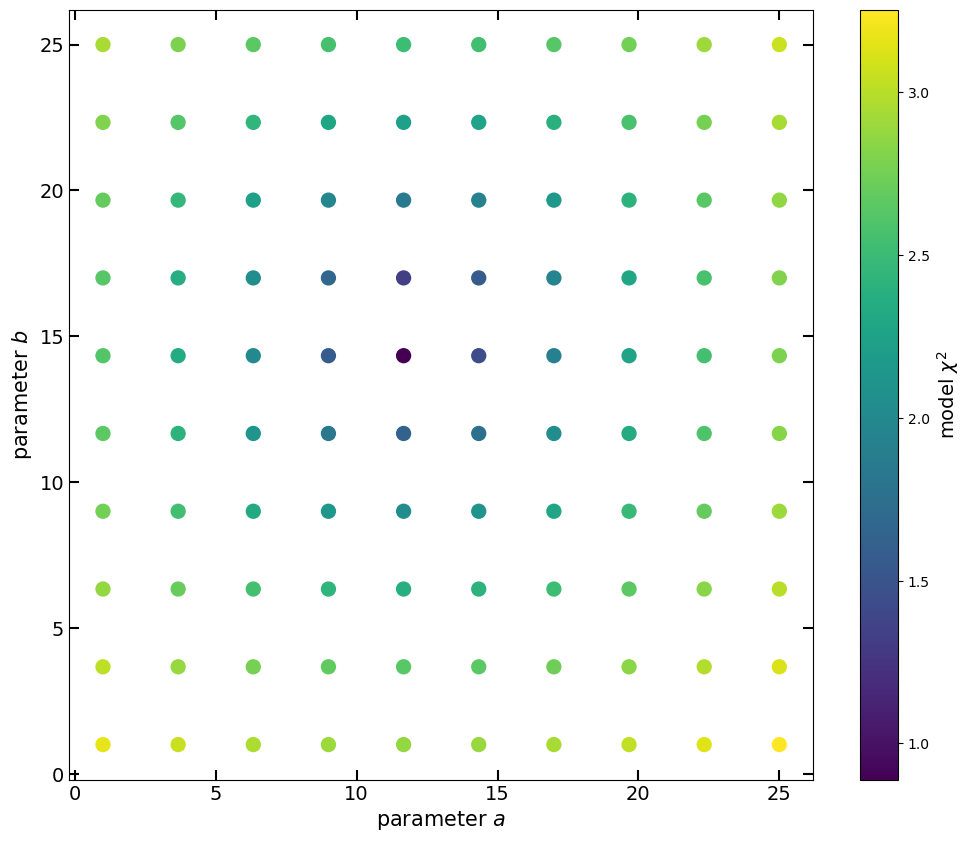

In [10]:
fig, ax = plt.subplots(figsize=(12,10))

im = ax.scatter(xx,yy,c=chi2_values,marker='o',s=100)
# Above is just re-laoding fig-- rest is just formatting tricks.
ax.tick_params(direction='in',right=True,top=True,length=7,width=1.5,labelsize=14)
ax.set_xlabel(r'parameter $a$',fontsize=15)
ax.set_ylabel(r'parameter $b$',fontsize=15)
cbar = plt.colorbar(im)
cbar.set_label(r'model $\chi^2$',fontsize=14);

Question 8
===

Some quick list comprehensions! For any unfamilar, comprehensions are pythonic statements that allow you to compress a for-loop (generally) into a single line, and usually runs faster than a full loop (but not by a ton).

Take the for-loop below and write it as a list comprehension.

In [11]:
visited_cities = ['San Diego', 'Boston', 'New York City','Atlanta']
all_cities = ['San Diego', 'Denver', 'Boston', 'Portland', 'New York City', 'San Francisco', 'Atlanta']

not_visited = []
for city in all_cities:
    if city not in visited_cities:
        not_visited.append(city)
        
print(not_visited)

['Denver', 'Portland', 'San Francisco']


In [13]:
not_visited = [i for i in all_cities if i not in visited_cities]
print(not_visited)

['Denver', 'Portland', 'San Francisco']


Next, create an array of integers including 1 through 30, inclusive. Using a comprehension, create a numpy array containing the squared value of only the odd numbers in your original array. (Hint, remember the modulo operator)

In [15]:
ints = np.arange(1,31)
odds_sqd = np.array([i**2 for i in ints if i%2!=0])
print(odds_sqd)

[  1   9  25  49  81 121 169 225 289 361 441 529 625 729 841]


In the next example, you have a list of first names and a list of last names. Use a list comprehension to create an array that is a list of full names (with a space between first and last names).

In [18]:
first_names = ['Bob','Samantha','John','Renee']
last_names = ['Smith','Bee','Oliver','Carpenter']

full_names = [i+' '+j for i,j in zip(first_names,last_names)]
print(full_names)

['Bob Smith', 'Samantha Bee', 'John Oliver', 'Renee Carpenter']


I’ve created new lists that contain strings of the names in the format Lastname,Firstname, with random leading/trailing spaces and terrible capitalizations. Use a list comprehension to make our nice, “Firstname Lastname” list again.

In [19]:
all_names = ['sMitH,BoB   ', '  bee,samanthA',' oLIVER,JOHN ','  caRPENTer,reneE  ']

# solution 
full_names = [i.strip().split(',')[1].upper()[0]
              +i.strip().split(',')[1].lower()[1:]
              +' '
              +i.strip().split(',')[0].upper()[0]
              +i.strip().split(',')[0].lower()[1:]
              for i in all_names]
print(full_names)

['Bob Smith', 'Samantha Bee', 'John Oliver', 'Renee Carpenter']


Note that with this last example, we’re entering a degree of single-line length and complexity that it almost doesn’t make sense to use a comprehension anymore. Just because something CAN be done in one line doesn’t mean is has to be, or should be.

You may be wondering what use case this type of coding has in astronomy – turns out, quite a lot. Take this example: you read in a data table and the columns have names like “FLUX HA”, “FLUX ERR”, etc.

If you’re trying to make a pandas DataFrame of this table, it is advantageous to rename these columns something like flux_ha and flux_err. This way, commands like df.flux_ha can be used.

Being able to iterate over the string list of column names and turn caps into lower case, spaces into underscores, etc., is a useful skill that will come in handy when wrangling data.

Below, for reference, I show how I myself would do the above example in production code:

In [20]:
def clean_csv_string(str_in,sep=',',formatting='LastFirst'):
    str_stripped = str_in.strip() # remove trailing/leading spaces
    str_split = str_stripped.split(sep) #split at delimiter
    str_cap_correct = [i.upper()[0]+i.lower()[1:] for i in str_split]
    if formatting=='LastFirst':
        out_string = str_cap_correct[1] + ' ' + str_cap_correct[0]
        return out_string
    elif formmatting=='FirstLast':
        out_string = str_cap_correct[0] + ' ' + str_cap_correct[1]
        return out_string
    else:
        raise ValueError('formatting not set correctly')


        
full_names = [clean_csv_string(i) for i in all_names]
print(full_names)

['Bob Smith', 'Samantha Bee', 'John Oliver', 'Renee Carpenter']


Question 9¶

Take the arrays XX, YY, and ZZ below and create one multidimensional array in which they are the columns. Print to confirm this worked.

In [21]:
XX = np.array([1,2,3,4,5,6,7,8,9])
YY = np.array([5,6,7,8,9,10,11,12,13])
ZZ = np.array([10,11,12,13,14,15,16,17,18])

cols = np.column_stack((XX,YY,ZZ))
cols

array([[ 1,  5, 10],
       [ 2,  6, 11],
       [ 3,  7, 12],
       [ 4,  8, 13],
       [ 5,  9, 14],
       [ 6, 10, 15],
       [ 7, 11, 16],
       [ 8, 12, 17],
       [ 9, 13, 18]])

Question 10
======
Units, units, units. The bane of every scientists’ existence… except theorists that set every constant equal to 1.

In the real world, we measure fluxes or magnitudes in astronomical images, infer temperatures and densities from data and simulations, and ultimately have to deal with units one way or another.

Thankfully, our friends at astropy know this, and they’ve come to save the day. This next question serves as an introduction to the units module in astropy, which can be both a live saver and a pain in the ass, but at the end of the day is absolutely worth learning.

In [23]:
import astropy.units as u

The standard import for this library is u, so be careful not to name any variables that letter.

To “assign” units to a variable, we multiply by the desired unit as follows. Note that generally the module knows several aliases/common abrreviations for a unit, if it is uniquely identifiable.

In [25]:
star_temp = 5000*u.K 
star_radius = 0.89 * u.Rsun 
star_mass = 0.6 * u.Msun

#We can perform trivial conversions using the .to() method.

star_radius.to(u.km)

# and get the unitless value with .value:

star_mass.to(u.kg).value

1.1930459224188305e+30

FITS can output correct units even through complex eqns, provided correct units are input throughout.

In [26]:
L = 4 * np.pi * (3.6*u.Mpc)**2 * (7.5e-14 * u.erg/u.s/u.cm**2)
L.to(u.Lsun)

<Quantity 30381.22564638 solLum>

Write a function that takes as an input a halo mass, redshift, and optionally μ (default 0.59), and returns the virial temperature in Kelvin. Your function should take in an astropy quantity with mass units, but should allow for the mass to be input with any appropriate units.

In [29]:
def Tvir(M,z,mu=0.59):
    return ((5.6e4*u.K)*(mu/0.59)*(M/(1e10*u.Msun))**(2/3.)*((1+z)/4)).to(u.K)
Tvir(10**11*u.Msun,z=3)

<Quantity 259928.97468232 K>